# Backtesting using various trading strategies

#### In the following code I have tried backtesting tesla stocks using various trading strategies(MACD, stochastic, stochastic + MACD, stochastic + bollinger)
#### The best strategy with the maximum returns turned out to be MACD.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as reader
import datetime as dt

pd.options.mode.chained_assignment = None  # default='warn'

### Importing data from yahoo finance

In [12]:
end = dt.datetime.now()
start = dt.date(end.year-11,end.month,end.day) #getting data from past 6 years
ticker = ['TSLA']

tsla = reader.get_data_yahoo(ticker,start,end) #getting data from yahoo finance
tsla

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-12-30,5.300000,5.300000,5.580000,5.276000,5.540000,10205500.0
2010-12-31,5.326000,5.326000,5.450000,5.300000,5.314000,7089500.0
2011-01-03,5.324000,5.324000,5.400000,5.180000,5.368000,6415000.0
2011-01-04,5.334000,5.334000,5.390000,5.204000,5.332000,5937000.0
2011-01-05,5.366000,5.366000,5.380000,5.238000,5.296000,7233500.0
...,...,...,...,...,...,...
2021-12-23,1067.000000,1067.000000,1072.979980,997.559998,1006.799988,30841900.0
2021-12-27,1093.939941,1093.939941,1117.000000,1070.719971,1073.670044,23715300.0


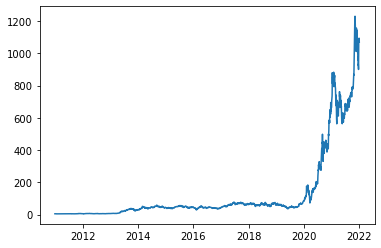

In [13]:
plt.plot(tsla['Close'])

### Bollinger band calculation

In [14]:
# BOLLINGER BANDS CALCULATION

def sma(data, lookback):
    sma = data.rolling(lookback).mean()
    return sma

def get_bb(data, lookback):
    std = data.rolling(lookback).std()
    upper_bb = sma(data, lookback) + std * 2
    lower_bb = sma(data, lookback) - std * 2
    middle_bb = sma(data, lookback)
    return upper_bb, lower_bb, middle_bb

tsla['upper_bb'], tsla['middle_bb'], tsla['lower_bb'] = get_bb(tsla['Close'], 20)
tsla = tsla.dropna()
tsla

Attributes,Adj Close,Close,High,Low,Open,Volume,upper_bb,middle_bb,lower_bb
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2011-01-27,4.984000,4.984000,5.016000,4.906000,4.948000,4478500.0,5.823786,4.533814,5.178800
2011-01-28,4.802000,4.802000,4.976000,4.750000,4.976000,5242000.0,5.817372,4.490428,5.153900
2011-01-31,4.820000,4.820000,4.824000,4.700000,4.810000,4151500.0,5.802941,4.454259,5.128600
2011-02-01,4.782000,4.782000,4.946000,4.708000,4.862000,3539000.0,5.786260,4.416740,5.101500
2011-02-02,4.788000,4.788000,4.836000,4.734000,4.832000,2847500.0,5.763452,4.384948,5.074200
...,...,...,...,...,...,...,...,...,...
2021-12-23,1067.000000,1067.000000,1072.979980,997.559998,1006.799988,30841900.0,1160.579399,877.773598,1019.176498
2021-12-27,1093.939941,1093.939941,1117.000000,1070.719971,1073.670044,23715300.0,1162.400148,877.154839,1019.777493


### Stochastic Oscillator Calculation

In [15]:
# STOCHASTIC OSCILLATOR CALCULATION

def get_stoch_osc(high, low, close, k_lookback, d_lookback):
    lowest_low = low.rolling(k_lookback).min()
    highest_high = high.rolling(k_lookback).max()
    k_line = ((close - lowest_low) / (highest_high - lowest_low)) * 100
    d_line = k_line.rolling(d_lookback).mean()
    return k_line, d_line

tsla['%k'], tsla['%d'] = get_stoch_osc(tsla['High'], tsla['Low'], tsla['Close'], 14, 3)
tsla = tsla.dropna()
tsla.reset_index(drop = True)
tsla

Attributes,Adj Close,Close,High,Low,Open,Volume,upper_bb,middle_bb,lower_bb,%k,%d
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,
Date,,,,,,,,,,,
2011-02-17,4.720000,4.720000,5.098000,4.710000,4.926000,13092000.0,5.033740,4.494660,4.764200,35.494833,42.190946
2011-02-18,4.636000,4.636000,4.698000,4.592000,4.666000,11853500.0,5.031996,4.499204,4.765600,21.160423,45.774796
2011-02-22,4.374000,4.374000,4.600000,4.356000,4.576000,10323000.0,5.050319,4.428481,4.739400,2.425893,19.693716
2011-02-23,4.366000,4.366000,4.500000,4.222000,4.436000,8028000.0,5.049229,4.372571,4.710900,16.438364,13.341560
2011-02-24,4.506000,4.506000,4.516000,4.300000,4.356000,5276500.0,5.019146,4.358254,4.688700,32.420085,17.094780
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,1067.000000,1067.000000,1072.979980,997.559998,1006.799988,30841900.0,1160.579399,877.773598,1019.176498,96.799753,59.978763
2021-12-27,1093.939941,1093.939941,1117.000000,1070.719971,1073.670044,23715300.0,1162.400148,877.154839,1019.777493,90.012102,82.282687


### MACD calculation

In [16]:
#MACD Calculation

def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = (exp1 - exp2)
    signal = macd.ewm(span = smooth, adjust = False).mean()
    hist = (macd - signal)
    return macd, signal, hist

tsla['macd'],tsla['signal'],tsla['hist'] = get_macd(tsla['Close'], 26, 12, 9)
tsla.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume,upper_bb,middle_bb,lower_bb,%k,%d,macd,signal,hist
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,,,
Date,,,,,,,,,,,,,,
2021-12-23,1067.000000,1067.000000,1072.979980,997.559998,1006.799988,30841900.0,1160.579399,877.773598,1019.176498,96.799753,59.978763,-19.293843,-19.252849,-0.040994
2021-12-27,1093.939941,1093.939941,1117.000000,1070.719971,1073.670044,23715300.0,1162.400148,877.154839,1019.777493,90.012102,82.282687,-9.798586,-17.361996,7.563410
2021-12-28,1088.469971,1088.469971,1119.000000,1078.420044,1109.489990,20108000.0,1153.062470,881.640515,1017.351492,86.890232,91.234029,-2.683969,-14.426391,11.742422
2021-12-29,1086.189941,1086.189941,1104.000000,1064.140015,1098.640015,18718000.0,1140.761930,888.084047,1014.422989,85.911174,87.604503,2.738866,-10.993339,13.732205
2021-12-30,1070.339966,1070.339966,1095.550049,1053.150024,1061.329956,15554200.0,1136.666732,889.713242,1013.189987,79.105104,83.968837,5.691928,-7.656286,13.348213


### Trading Strategy

In [17]:
tsla['Position'] = np.nan
for i in range(len(tsla)):
    
        if (bool(tsla['macd'].iloc[i] < tsla['signal'].iloc[i])): # and bool(tsla['%k'].iloc[i-1] > 30) and bool(tsla['%d'].iloc[i-1] > 30) and bool(tsla['%k'].iloc[i] < 30) and bool(tsla['%d'].iloc[i] < 30)):
            tsla['Position'].iloc[i] = -1
        
        if (bool(tsla['macd'].iloc[i] > tsla['signal'].iloc[i])): # and bool(tsla['%k'].iloc[i-1] < 70) and bool(tsla['%d'].iloc[i-1] < 70) and bool(tsla['%k'].iloc[i] > 70) and bool(tsla['%d'].iloc[i] > 70)):
            tsla['Position'].iloc[i] = 1
            

### Backtesting

In [18]:
tsla['Position'].fillna(method='ffill',inplace=True)
    
tsla['Market Return'] = np.log(tsla['Close'] / tsla['Close'].shift(1))
tsla['Strategy Return'] = tsla['Market Return'] * tsla['Position'].shift(1)

### Random Checking

In [19]:
ctr1=0
ctr2=0
for i in range(len(tsla['Close'])):
    if(tsla['Position'].iloc[i]== -1):
        ctr1=ctr1+1
    if(tsla['Position'].iloc[i]== 1):
        ctr2=ctr2+1
        
print(ctr1)
print(ctr2)

1299
1436


### Returns 

<AxesSubplot:xlabel='Date'>

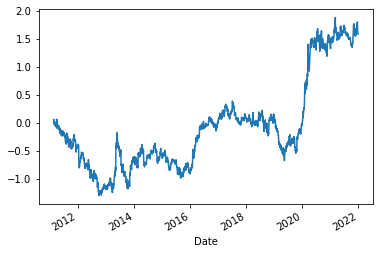

In [20]:
tsla['Strategy Return'].cumsum().plot()